In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np

In [2]:
IMG_SIZE = (224, 224)  # ResNet expects 224x224
BATCH_SIZE = 32

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = True
)

Found 557 files belonging to 2 classes.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 140 files belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),        # Flip images left-right
    layers.RandomRotation(0.1),             # Rotate up to 10%
    layers.RandomZoom(0.1),                 # Zoom in/out
    layers.RandomContrast(0.1),             # Contrast changes
])

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    layers.Rescaling(1./255),  # normalize
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)


In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 641ms/step - accuracy: 0.5476 - loss: 0.7075 - val_accuracy: 0.4929 - val_loss: 0.7194 - learning_rate: 0.0010
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 577ms/step - accuracy: 0.5404 - loss: 0.7003 - val_accuracy: 0.5286 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.5512 - loss: 0.6801 - val_accuracy: 0.5571 - val_loss: 0.6730 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 592ms/step - accuracy: 0.5691 - loss: 0.6836 - val_accuracy: 0.5929 - val_loss: 0.6698 - learning_rate: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 593ms/step - accuracy: 0.5727 - loss: 0.6716 - val_accuracy: 0.5714 - val_loss: 0.6702 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6007 - loss: 0.6502
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 595ms/step - accuracy: 0.5889 - loss: 0.65

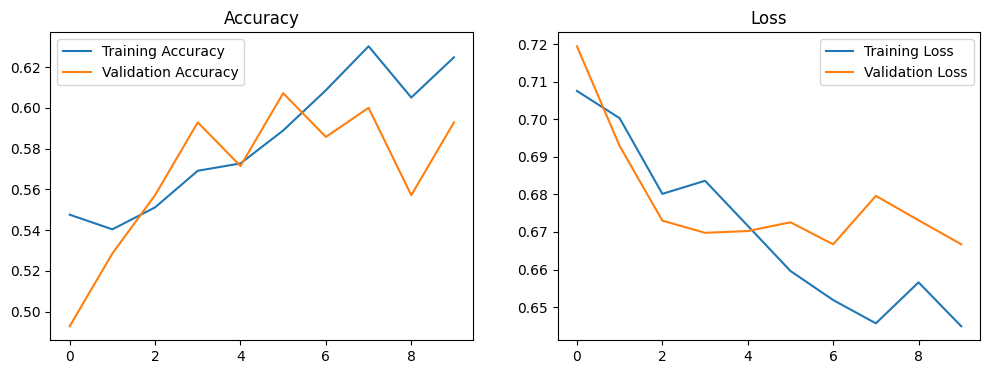

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: 0


In [21]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - accuracy: 0.5857 - loss: 0.6667
Validation Accuracy: 58.57%
